In [133]:
# importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
data=pd.read_csv('MSFT.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8972,2021-10-15,302.339996,304.450012,300.519989,304.209991,304.209991,25374700
8973,2021-10-18,303.570007,308.209991,302.690002,307.290009,307.290009,22729300
8974,2021-10-19,308.350006,309.299988,307.220001,308.230011,308.230011,17682100
8975,2021-10-20,309.209991,309.700012,306.109985,307.410004,307.410004,16537100
8976,2021-10-21,307.170013,311.019989,306.359985,310.760010,310.760010,16883800


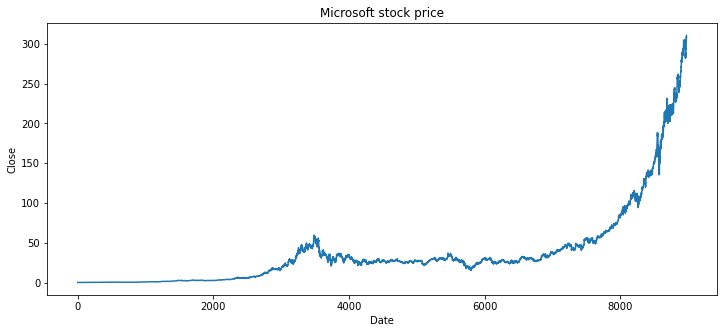

In [219]:
#let us draw the graph of existing data with mmatplotlib
plt.figure(figsize=(12,5))
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Microsoft stock price')
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999933  0.999929  0.999864   0.996774 -0.308422
High       0.999933  1.000000  0.999890  0.999925   0.996734 -0.306779
Low        0.999929  0.999890  1.000000  0.999931   0.996941 -0.310103
Close      0.999864  0.999925  0.999931  1.000000   0.996917 -0.308539
Adj Close  0.996774  0.996734  0.996941  0.996917   1.000000 -0.311504
Volume    -0.308422 -0.306779 -0.310103 -0.308539  -0.311504  1.000000


<AxesSubplot:>

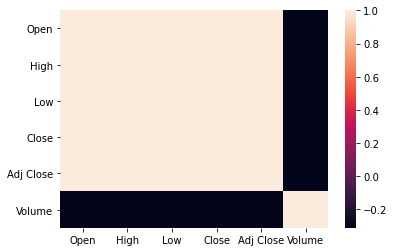

In [220]:
# A look at the correlation of variables
print(data.corr())
sns.heatmap(data.corr())

In [221]:
# Now we will choose the independent and the target/dependent variables based on correlation
x = data[['Open','High','Low']]
y= data['Close']
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(8977, 3)
(8977, 1)


In [188]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x, y, test_size = 0.3, random_state = 51)

In [222]:
# Training the model with decision tree 
from sklearn.tree import DecisionTreeRegressor as DTR
model = DTR()
fit=model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame({'Predicted Close':ypred})
data['ypred']=ytest
data.head(30)

,Predicted Close,ypred
0,210.110001,213.860001
1,252.570007,253.250000
2,296.309998,294.850006
3,222.419998,219.419998
4,214.070007,212.250000
5,249.309998,249.679993
6,259.429993,257.380005
7,258.359985,259.890015
8,265.510010,261.549988
9,221.679993,223.940002


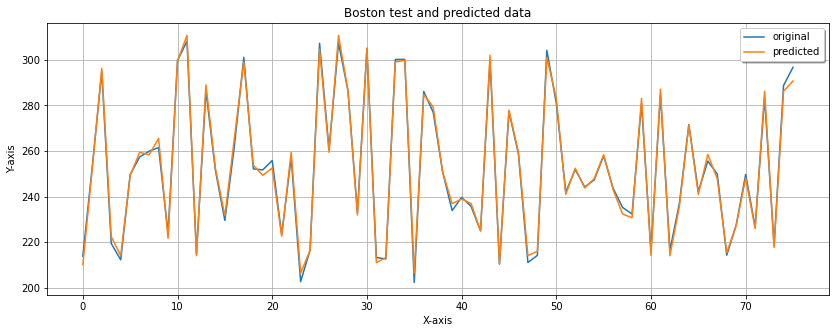

In [223]:
# Plotting graph showing the Close price(y) of predicted(ypred) and original(ytest) ones of test set
x_ax = range(len(ytest))
plt.figure(figsize=(14,5))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [224]:
# The accuracy of the model
score=fit.score(xtest,ytest)
print(score)

0.9954285972319014
